<a href="https://colab.research.google.com/github/Santhoshpola08/Netflix-Data-Cleaning-Analysis-and-Visualization/blob/main/Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Netflix Data: Cleaning, Analysis and Visualization**

**Module 1: Import Libraries & Load Data**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [ ]:
# Load dataset
data = pd.read_csv("netflix1.csv")

# Basic inspection
data.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


**Module 2: Data Understandin**

In [ ]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [ ]:
data.shape

(8790, 10)

In [ ]:
# Check missing values
data.isnull().sum()


,0
show_id,0
type,0
title,0
director,0
country,0
date_added,0
release_year,0
rating,0
duration,0
listed_in,0


** Module 3: Data Cleaning (Improved Accuracy)**

In [ ]:
#Remove duplicates
data = data.drop_duplicates()


In [ ]:
#Handle missing values properly
data['director'] = data['director'].fillna('Unknown')
data['country'] = data['country'].fillna('Unknown')
data['rating'] = data['rating'].fillna(data['rating'].mode()[0])

In [ ]:
#Convert date_added safely
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')


**Module 4: Feature Engineering**

In [ ]:
data['year_added'] = data['date_added'].dt.year
data['month_added'] = data['date_added'].dt.month
data['month_name'] = data['date_added'].dt.month_name()

In [ ]:
#Duration Feature Split
data[['duration_value', 'duration_type']] = data['duration'].str.extract(r'(\d+)\s*(\w+)')
data['duration_value'] = pd.to_numeric(data['duration_value'], errors='coerce')


**Module 5: Content Distribution Analysis**

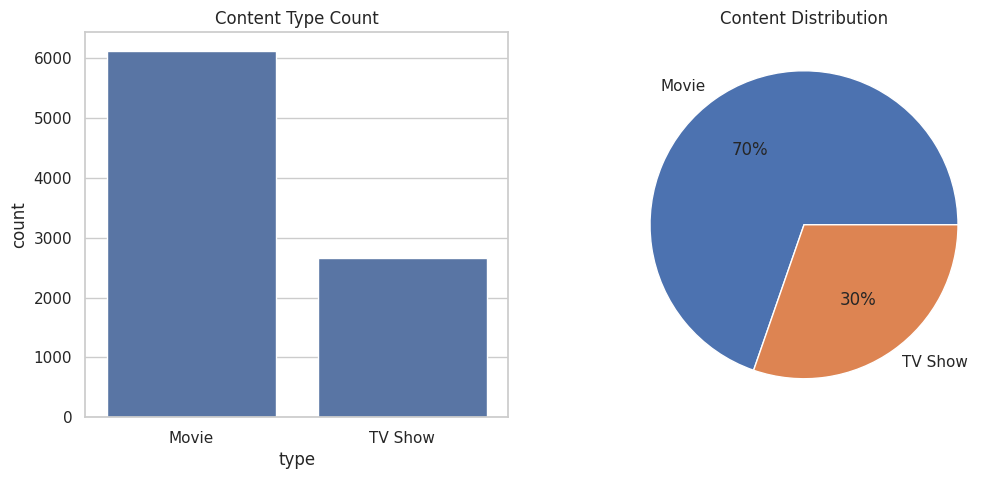

In [ ]:
content_count = data['type'].value_counts()

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x='type', data=data, ax=ax[0])
ax[0].set_title("Content Type Count")

ax[1].pie(content_count, labels=content_count.index, autopct='%1.0f%%')
ax[1].set_title("Content Distribution")

plt.show()


**Module 6: Rating Analysis**

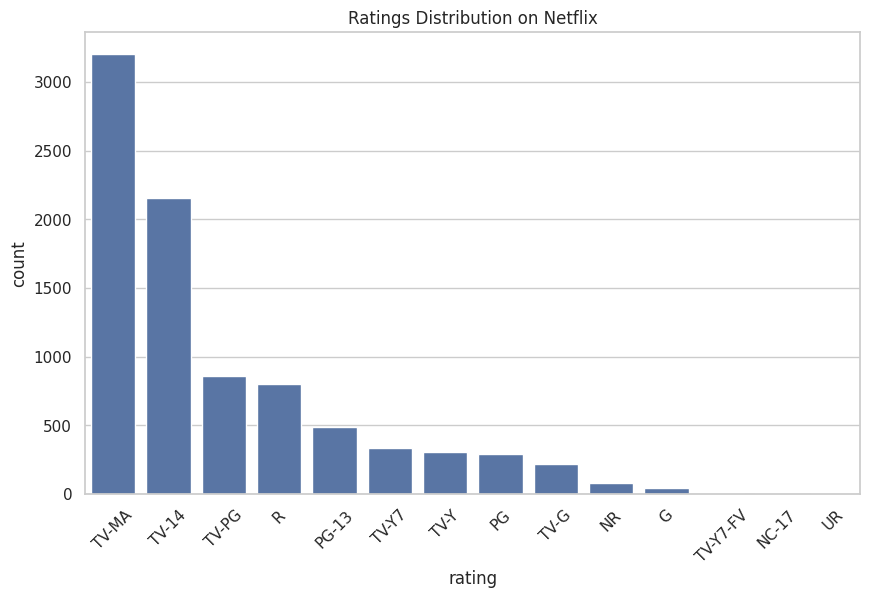

In [ ]:
rating_counts = data['rating'].value_counts().reset_index()
rating_counts.columns = ['rating', 'count']

sns.barplot(x='rating', y='count', data=rating_counts)
plt.xticks(rotation=45)
plt.title("Ratings Distribution on Netflix")
plt.show()


**Module 7: Country Analysis**

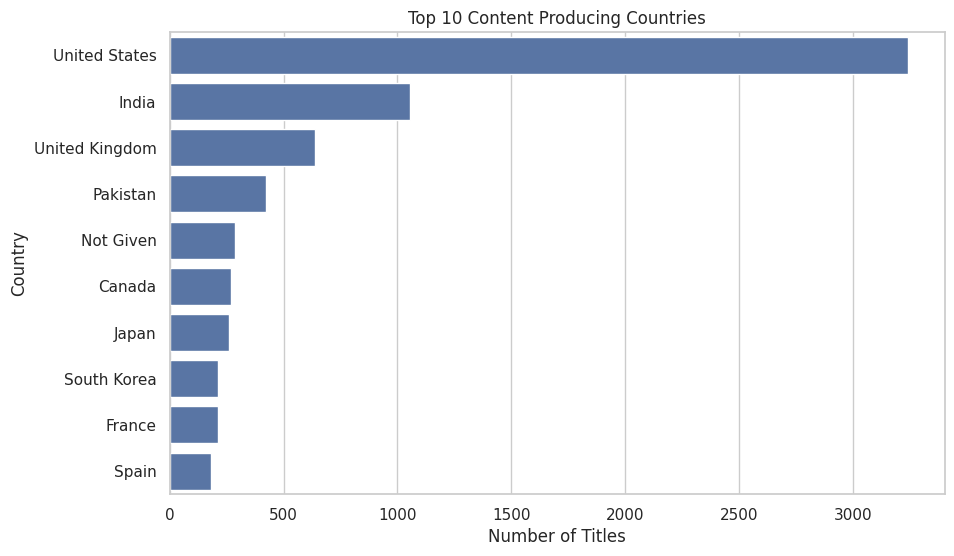

In [ ]:
top_countries = data['country'].value_counts().head(10)

sns.barplot(x=top_countries.values, y=top_countries.index)
plt.xlabel("Number of Titles")
plt.ylabel("Country")
plt.title("Top 10 Content Producing Countries")
plt.show()


**Module 8: Monthly & Yearly Release Trends**

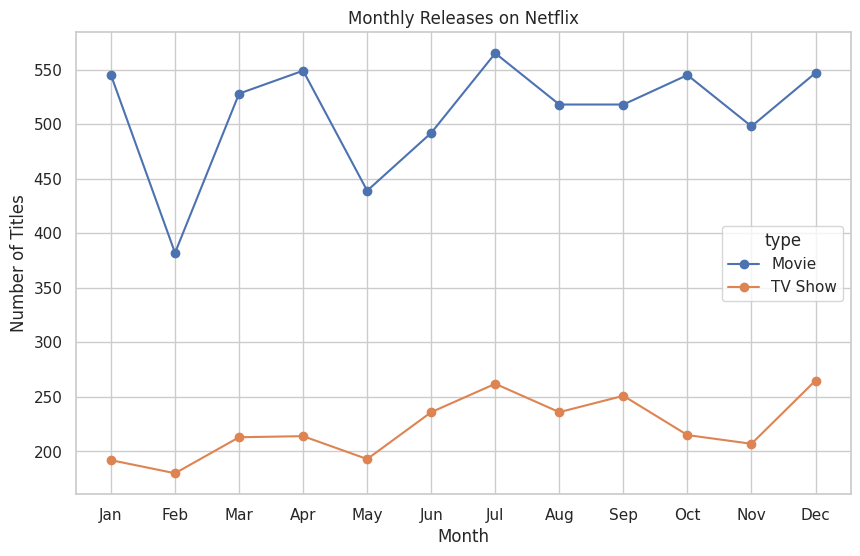

In [ ]:
# Monthly Releases

monthly_release = data.groupby(['month_added', 'type']).size().unstack()

monthly_release.plot(marker='o')
plt.xticks(range(1,13),
           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.title("Monthly Releases on Netflix")
plt.xlabel("Month")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


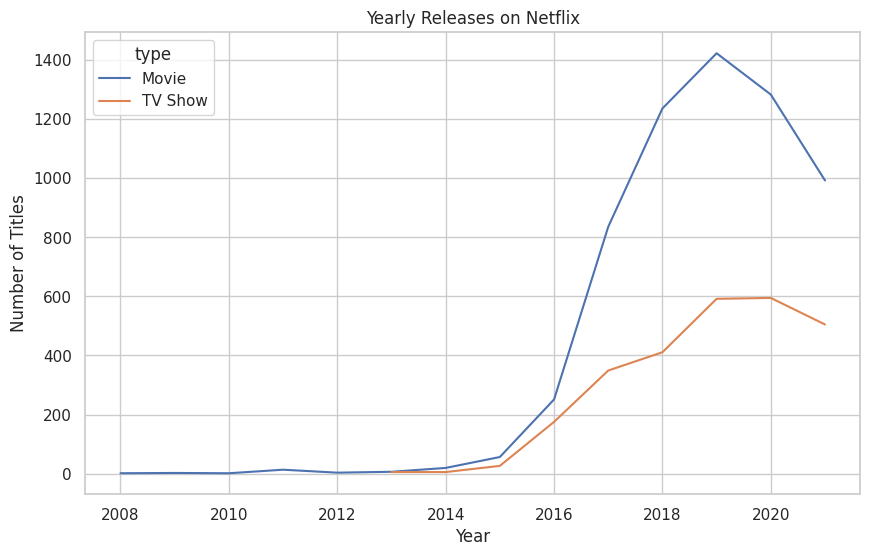

In [ ]:
# Yearly Releases

yearly_release = data.groupby(['year_added', 'type']).size().unstack()

yearly_release.plot()
plt.title("Yearly Releases on Netflix")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()


**Module 9: Genre Analysis**

In [ ]:
genre_data = data.assign(genre=data['listed_in'].str.split(', ')).explode('genre')


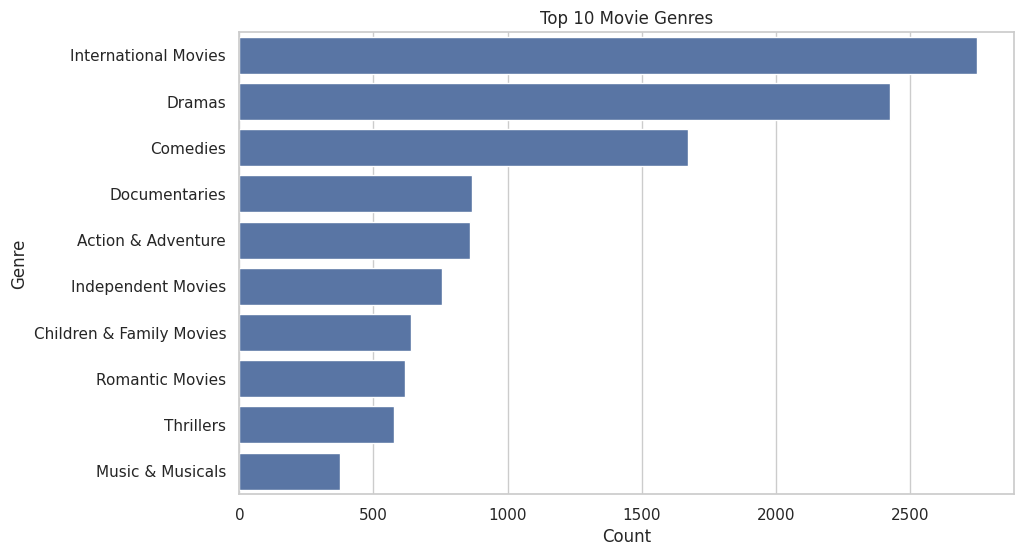

In [ ]:
# Top 10 Movie Genres

movie_genres = genre_data[genre_data['type'] == 'Movie']['genre'].value_counts().head(10)

sns.barplot(x=movie_genres.values, y=movie_genres.index)
plt.title("Top 10 Movie Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


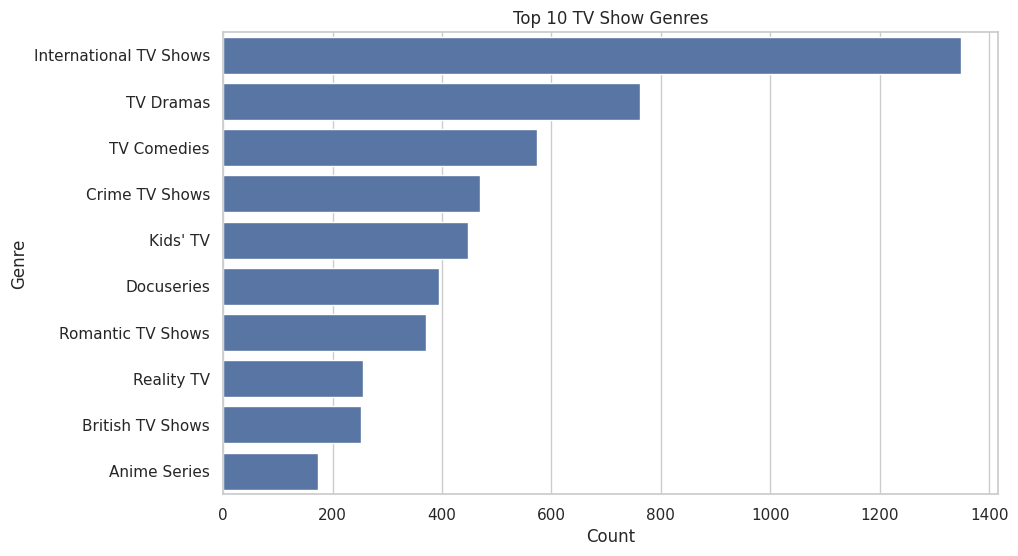

In [ ]:
# Top 10 TV Show Genres

tv_genres = genre_data[genre_data['type'] == 'TV Show']['genre'].value_counts().head(10)

sns.barplot(x=tv_genres.values, y=tv_genres.index)
plt.title("Top 10 TV Show Genres")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()


**Module 10: Director Analysis**

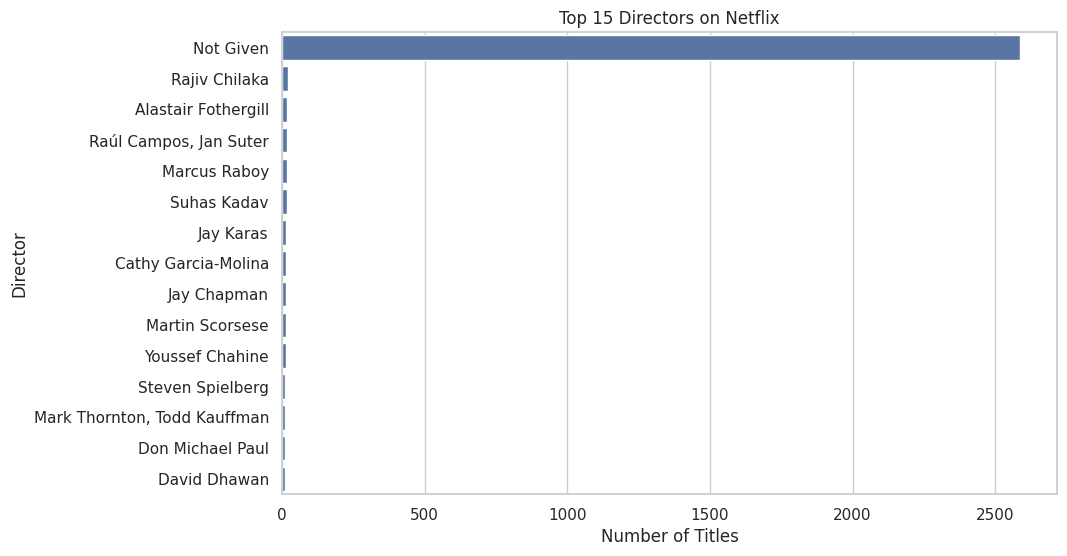

In [ ]:
top_directors = data[data['director'] != 'Unknown']['director'].value_counts().head(15)

sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title("Top 15 Directors on Netflix")
plt.xlabel("Number of Titles")
plt.ylabel("Director")
plt.show()


**Module 11: Beginner ML Readiness**

In [ ]:
# Prepare ML Dataset

ml_data = data[['type', 'rating', 'duration_value', 'year_added']].copy()
ml_data = ml_data.dropna()


**Encode Target Variable**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
ml_data['type_encoded'] = le.fit_transform(ml_data['type'])

# Movie = 0, TV Show = 1 (order may vary)
ml_data[['type', 'type_encoded']].head()


,type,type_encoded
0,Movie,0
1,TV Show,1
2,TV Show,1
3,Movie,0
4,Movie,0


**Encode Categorical Features**

In [ ]:
ml_data_encoded = pd.get_dummies(ml_data, columns=['rating'], drop_first=True)


**Define Features & Target**

In [ ]:
X = ml_data_encoded.drop(['type', 'type_encoded'], axis=1)
y = ml_data_encoded['type_encoded']


**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


**Feature Scaling (Important for ML)**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


**Train Baseline Models**

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [ ]:
# Logistic Regression Evaluation

y_pred_lr = lr.predict(X_test_scaled)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9977246871444824
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       0.99      1.00      1.00       533

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



In [ ]:
# Random Forest Evaluation

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.9977246871444824
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1225
           1       1.00      1.00      1.00       533

    accuracy                           1.00      1758
   macro avg       1.00      1.00      1.00      1758
weighted avg       1.00      1.00      1.00      1758



**Confusion Matrix Visualization**

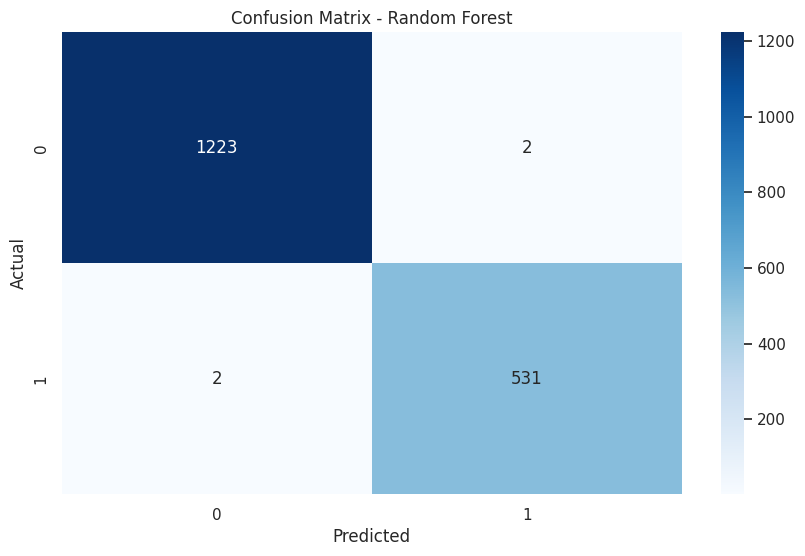

In [ ]:
sns.heatmap(
    confusion_matrix(y_test, y_pred_rf),
    annot=True, fmt='d', cmap='Blues'
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


**Feature Importance**

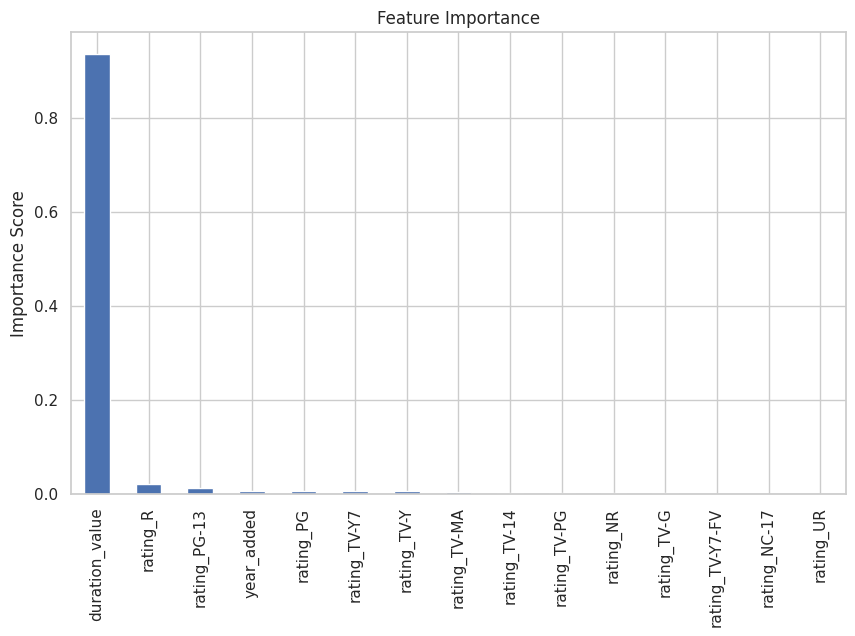

In [ ]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance.plot(kind='bar')
plt.title("Feature Importance")
plt.ylabel("Importance Score")
plt.show()
